# EC209AS - CA1
Parangat Mittal<br>
parangat@g.ucla.edu


## Step 1 - Convert hex to base64

> The string:
> ```
> 49276d206b696c6c696e6720796f757220627261696e206c696b65206120706f69736f6e6f7573206d757368726f6f6d
> ```
> Should produce:
> ```
> SSdtIGtpbGxpbmcgeW91ciBicmFpbiBsaWtlIGEgcG9pc29ub3VzIG11c2hyb29t
> ```
> So go ahead and make that happen. You'll need to use this code for the rest of the exercises.
>
> ### Comment
>
> Always operate on raw bytes, never on encoded strings. Only use hex and base64 for pretty-printing.

#### Description

Since we always operate on bytes, the first step is to convert the hex string into bytes. 
This is being done by the following code:
```bytes.fromhex(hex_string)```

Once the hex string has been converted into bytes, it is converted into a base64-encoded byte string, via `b64encode()`.
Finally, the byte string is converted into a base64 string, using the `.decode()` function of the byte string.

In [1]:
# your code here ... (put some comments to explain what you did)
from base64 import b64encode, b64decode

def hex_to_base64(hex_string):
    return b64encode(bytes.fromhex(hex_string)).decode()

hex_string = "49276d206b696c6c696e6720796f757220627261696e206c696b65206120706f69736f6e6f7573206d757368726f6f6d"
base64_string = hex_to_base64(hex_string)

print("hex_string is: ", hex_string)
print("base64_string is: ", base64_string)

hex_string is:  49276d206b696c6c696e6720796f757220627261696e206c696b65206120706f69736f6e6f7573206d757368726f6f6d
base64_string is:  SSdtIGtpbGxpbmcgeW91ciBicmFpbiBsaWtlIGEgcG9pc29ub3VzIG11c2hyb29t


#### Output:
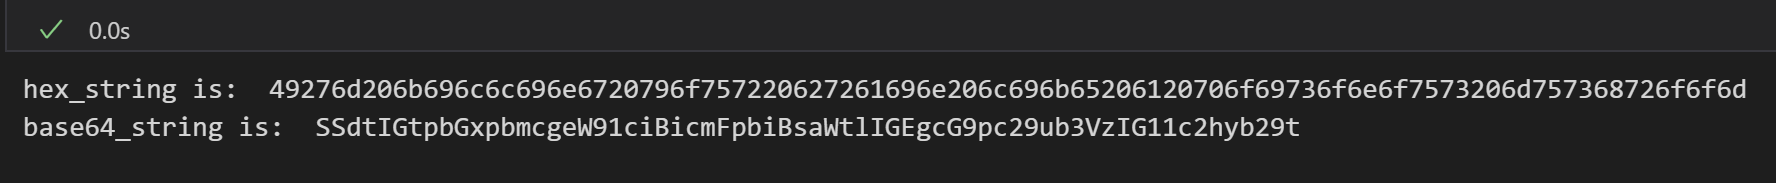

## Step 2 - Fixed XOR

> Write a function that takes two equal-length buffers and produces their XOR combination.
>
> If your function works properly, then when you feed it the string:
> ```
> 1c0111001f010100061a024b53535009181c
> ```
> ... after hex decoding, and when XOR'd (bitwise) against:
> ```
> 686974207468652062756c6c277320657965
> ```
> ... should produce:
> ```
> 746865206b696420646f6e277420706c6179
> ```

#### Description:

In Python, the bitwise exclusive-OR (or XOR) `^` operator works on data type `int`. 

The first step is to converted the hex strings into hexadecimal integers, which is achieved by encoding them as integers with base 16 (i.e. hexadecimal). This is done with the help of `int(hex_string, 16)` function.

Once both the hex strings have been converted to hexadecimal integers, they are XORed using `^` operator. The resulting int value is converted back to hex string using the `hex()` method.

P.S. the `hex()` method returns the hex string in the standard 0x... format. The initial 2 characters "0x" are removed from the result by slicing the string via `[2:]`.

In [2]:
# your code with comments ... (feel free to add as many as helper functions as you need!)
def fix_xor(string_1, string_2):
    int16_1 = int(string_1, 16)
    int16_2 = int(string_2, 16)
    xor_string = int16_1^int16_2
    return hex(xor_string)[2:]

string_1 = "1c0111001f010100061a024b53535009181c"
string_2 = "686974207468652062756c6c277320657965"
xor_string = fix_xor(string_1, string_2)

print("string_1 is: ", string_1)
print("string_2 is: ", string_2)
print("xor_string is: ", xor_string)

string_1 is:  1c0111001f010100061a024b53535009181c
string_2 is:  686974207468652062756c6c277320657965
xor_string is:  746865206b696420646f6e277420706c6179


#### Output:
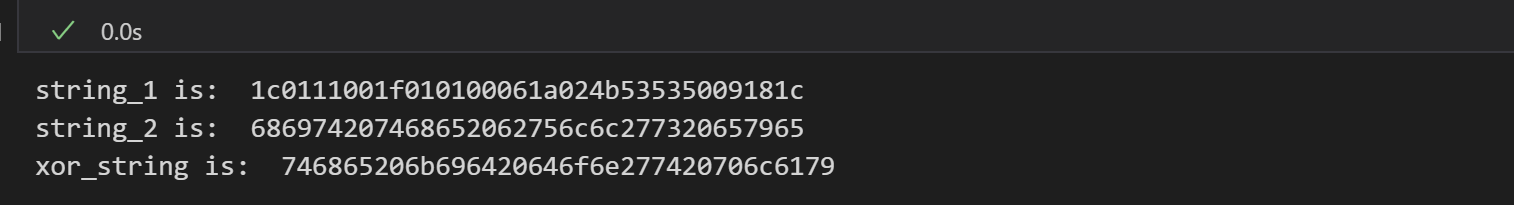

## Step 3 - Single-byte XOR cipher

> The hex encoded string:
> ```
> 1b37373331363f78151b7f2b783431333d78397828372d363c78373e783a393b3736
> ```
> ... has been XOR'd against a single character. Find the key (which is one byte) and decrypt the message. The message is a meaningful sentence in English!
>
> You should write a code to find the key and decrypt the message. Don't do it manually!
>
> ### Comment
> There are several mini steps to achieve this! First, you need a strategy for searching in the key space. Second, you need a test/scoring mechanism to check whether the decrypted message is  meaningful or not (i.e., detecting garbage vs. the correct output). You can read more about *"Caesar"* cipher to get some ideas and more background!

#### Description

Step-by-step approach for this step:
1. Repeat the he single-byte XOR key to match the length of the encoded string.
2. XOR each byte of the encoded string with the single-byte key (same as bitwise XOR of encoded string and byte-extended key)
3. Perform the XOR operation for the whole keyspace (00 to FF) and get the potential decoded messages.
4. Use the scoring mechanism defined below to score the decoded messages, and find the winner with the highest score.
5. The highest score winner is the original decoded message and the key is the single-byte key it was XORed with.

Scoring mechanism: <br>
A valid English sentence would be composed of alphabets from `a-z` and `A-Z` and whitespaces `  `. Each of the decoded string is assigned a numeric score based on the number of alphabets and number of spaces in the string. The one with the highest score would potentially have the lowest number of garbage characters, and hence would be the valid English sentence.

Implementation:
1. and 2. are implemented in `get_xor_one_byte()` function.
3. is implemented in `get_single_byte_xor_decode()` function.
4. is implemented in `get_english_score()` function.
5. is implemented in the `find_winner()` function.

In [3]:
# your code with comment

def get_xor_one_byte(encoded_bytes, key):
    #repeating the key to match the length of the encoded message
    equalized_key = bytes([key] * len(encoded_bytes))
    #bitwise XOR of the encoded message and the byte-extended key
    decoded_bytes = bytes(x ^ y for x, y in zip(encoded_bytes, equalized_key))
    return decoded_bytes

def get_english_score(test_string):
    #find if the character is an alphabet or not, and sum them to find the total number of alphabets
    no_char = sum(char.isalpha() for char in test_string)
    #count the number of whitespaces in the string
    no_space = test_string.count(' ')
    #score is no of alphabets and whitespaces
    no_total = no_char + no_space
    return no_total

def get_single_byte_xor_decode(hex_encoded_string):
    encoded_bytes = bytes.fromhex(hex_encoded_string)
    decoded_msgs = []

    #iterating over the whole keyspace (00 to FF, i.e. 0 to 256)
    for key in range(256):
        decoded_bytes = get_xor_one_byte(encoded_bytes, key)
        #convert the decoded message into a string.
        #errors=ignore is enforced since some of garbage characters do not get decoded properly
        decoded_text = decoded_bytes.decode('utf-8', errors='ignore')
        decoded_msgs.append([key, decoded_text])

    return decoded_msgs

def find_winner(decoded_msgs):
    winner_msg = ''
    winner_score = 0
    winner_key = '0'
    for i in range(len(decoded_msgs)):
        score = get_english_score(decoded_msgs[i][1])
        #finding the decoded message with the highest score
        if(score > winner_score):
            winner_score = score
            winner_msg = decoded_msgs[i][1]
            winner_key = decoded_msgs[i][0]
    return winner_msg, winner_score, winner_key

#wrapper function for this whole step
def single_byte_xor_cipher(hex_encoded_string):
    decoded_msgs = get_single_byte_xor_decode(hex_encoded_string)
    decoded_msg, score, enc_key = find_winner(decoded_msgs)
    return decoded_msg, score, enc_key

hex_encoded_string = "1b37373331363f78151b7f2b783431333d78397828372d363c78373e783a393b3736"

original_msg, score, enc_key = single_byte_xor_cipher(hex_encoded_string)

print("encoded string is: ", hex_encoded_string)
print("decoded string is: ", original_msg)
# print("winner score is: ", score)
# print("Length of message is : ", len(original_msg))
print("encryption key is: ", enc_key)


encoded string is:  1b37373331363f78151b7f2b783431333d78397828372d363c78373e783a393b3736
decoded string is:  Cooking MC's like a pound of bacon
encryption key is:  88


#### Output:
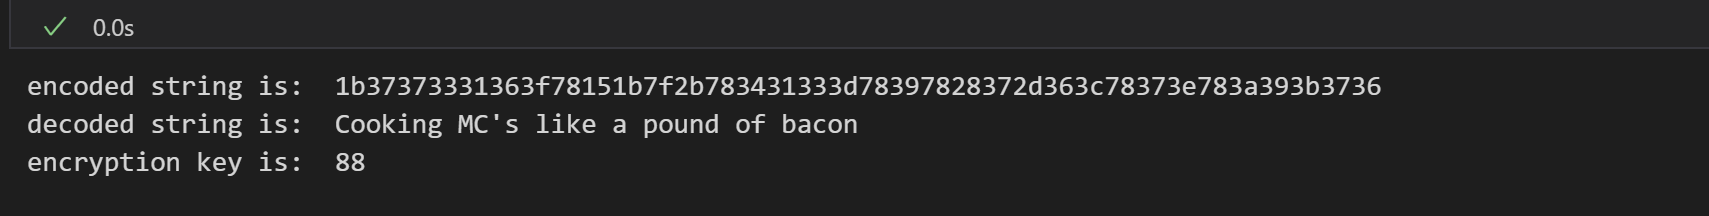

## Step 4 - Detect single-character XOR

> One of the 60-character strings in [this file](data/04.txt) has been encrypted by single-character XOR (each line is one string).
>
> Find it.
>
> ### Comment
> You should use your code in Step 3 to test each line. One line should output a meaningful message. Remeber that you don't know the key either but you can find it for each line (if any). 

#### Description

TLDR: This is an extension of the Step 3 implementation of single-byte XOR cipher, where the function has to be run on each line to find the meaningful sentence. 

Approach:
1. For each line in the given file, single-byte XOR is performed and the decoded messages obtained from the keyspace (00 to FF) is stored alongwith the key.
2. Each of the decoded messages is scored using the scoring mechanism defined in previous step, and the one with highest score is found. (meaningful English sentence)
3. Tracing back to the list where all the decoded messages were stored, the index and the key associated with the winner message is found out.

Implementation:<br>
For 1, the `single_byte_xor_cipher()` is called from step 3 to get all the possible decrypted messages.<br>
2. is implemented by calling the `find_winner()` function declared in step 3.

In [4]:
# your code with comment

#reading the lines of the files in a list
file1 = "data/04.txt"
with open(file1, "r") as file1:
    lines = file1.readlines()

all_winner_msgs = []
possible_msgs = []

#for each line all possible decoded messages are obtained
for i,line in enumerate(lines):
    #line.rstrip() to remove the trailing newline character
    decoded_msg, score, enc_key = single_byte_xor_cipher(line.rstrip())
    all_winner_msgs.append([i, decoded_msg, score, enc_key])

#possible_msg list created compatible with the function find_winner()
for a in all_winner_msgs:
    possible_msgs.append([a[3],a[1]])

#finding the message with the highest score
winner_msg, winner_score, winner_key = find_winner(possible_msgs)
# print(winner_msg, winner_key, winner_score)

winner_line = 0

#tracing back to find the line which was encoded
for msg in all_winner_msgs:
    if(msg[2] == winner_score):
        winner_line = msg[0]

print("encoded line number: ", winner_line)
print("encoded string is: ", lines[winner_line].rstrip())
print("decoded string is: ", winner_msg.rstrip())
print("encryption key is: ", winner_key)

encoded line number:  170
encoded string is:  7b5a4215415d544115415d5015455447414c155c46155f4058455c5b523f
decoded string is:  Now that the party is jumping
encryption key is:  53


#### Output:
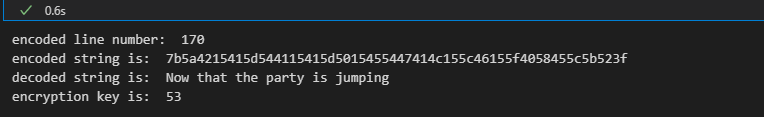

## Step 5 - Implement repeating-key XOR

> Here is the opening stanza of an important work of the English language:
> ```
> Burning 'em, if you ain't quick and nimble
> I go crazy when I hear a cymbal
> ```
> Encrypt it, under the key "ICE", using repeating-key XOR.
>
> In repeating-key XOR, you'll sequentially apply each byte of the key; the first byte of plaintext will be XOR'd against I, the next C, the next E, then I again for the 4th byte, and so on.
>
> It should come out to:
> ```
> 0b3637272a2b2e63622c2e69692a23693a2a3c6324202d623d63343c2a26226324272765272
> a282b2f20430a652e2c652a3124333a653e2b2027630c692b20283165286326302e27282f
> ```


#### Description:

For this step, the input string as well as the key are available as an alphabet string and would need to be converted to byte-form for operation.

**unencrypted message** - <br>
The string is converted to bytes using the built-in `.encode()` string function available in Python. The standard `utf-8` encoding is used.

**key** - <br>
Each byte of the key is repeated multiple times sequentially to match the length of the message to be encrypted. This is achieved as follows:<br>
`key[i % len(key)]` gives each byte of the key when iterated over `for i in range(len(unencrypted_msg)` <br>
`ord()` returns the corresponding number representing the string, i.e. "I" "C" or "E"<br>
`bytearray()` converts this list of numbers to bytes

Each of the unencrypted_bytes and repeated_key is bitwise XORed, essentially XORing the first byte of key with first byte of message, and repeating it when all bytes of key are exhausted.

In [5]:
# your code with comments
def xor_with_repeating_key(unencrypted_msg, key):
    #repeating the key again and again to match the length of the message to be encoded
    repeated_key = bytearray([ord(key[i % len(key)]) for i in range(len(unencrypted_msg))])
    #converting the original message to bytes
    unencrypted_bytes = unencrypted_msg.encode('utf-8')
    #bitwise XOR operation
    encrypted_bytes = bytes(x ^ y for x, y in zip(unencrypted_bytes, repeated_key))
    #convering the XORed bytes tp hex string
    encrypted_hex = encrypted_bytes.hex()
    return encrypted_hex

unencrypted_msg = "Burning 'em, if you ain't quick and nimble\nI go crazy when I hear a cymbal"
key = "ICE"

encrypted_hex = xor_with_repeating_key(unencrypted_msg, key)
print("unencrypted_msg is: \n", unencrypted_msg)
print("repeating key is: ", key)
print("encrypted_msg is: ", encrypted_hex)


unencrypted_msg is: 
 Burning 'em, if you ain't quick and nimble
I go crazy when I hear a cymbal
repeating key is:  ICE
encrypted_msg is:  0b3637272a2b2e63622c2e69692a23693a2a3c6324202d623d63343c2a26226324272765272a282b2f20430a652e2c652a3124333a653e2b2027630c692b20283165286326302e27282f


#### Output:
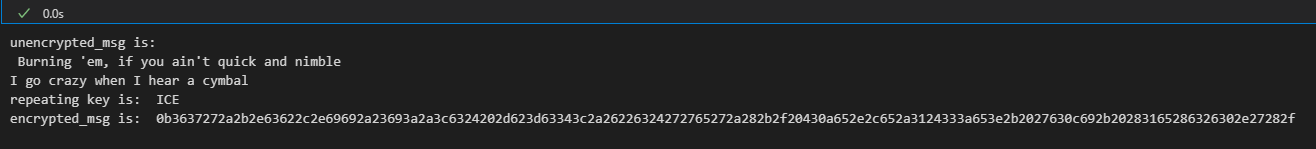

## Step 6 (Main Step) - Break repeating-key XOR

> There's a file [here](data/06.txt). It's been base64'd after being encrypted with repeating-key XOR.
>
> Decrypt it.
>
> Here's how:
>
> - Let KEYSIZE be the guessed length of the key; try values from 2 to (say) 40.
>
> - Write a function to compute the edit distance/Hamming distance between two strings. The Hamming distance is just the number of differing bits. The distance between:
```"this is a test"```
and
```"wokka wokka!!!"```
is 37. Make sure your code agrees before you proceed.
>
> - For each KEYSIZE, take the first KEYSIZE worth of bytes, and the second KEYSIZE worth of bytes, and find the edit distance between them. Normalize this result by dividing by KEYSIZE.
>
> - The KEYSIZE with the smallest normalized edit distance is probably the key. You could proceed perhaps with the smallest 2-3 KEYSIZE values. Or take 4 KEYSIZE blocks instead of 2 and average the distances.
>
> - Now that you probably know the KEYSIZE: break the ciphertext into blocks of KEYSIZE length.
>
> - Now transpose the blocks: make a block that is the first byte of every block, and a block that is the second byte of every block, and so on.
>
> - Solve each block as if it was single-character XOR. You already have code to do this.
> For each block, the single-byte XOR key that produces the best looking histogram is the repeating-key XOR key byte for that block. Put them together and you have the key.

#### Description

Step-by-step approach:
1. **Finding the optimum keysize** - <br>
a. Divide the ciphertext into slices of keysize length<br>
b. For each consecutive slice, calculate the hamming distance between them and normalize it by dividing it with keysize<br>
c. Find the minimum averaged normalized hamming distance and the associated keysize for it<br><br>
2. **Breaking the ciphertext** into slices of this guessed keysize length <br>
a. Pad the slice with zeros which has fewer number of bytes compared to the other slices (mostly the last slice) <br><br>
3. **Transposing the blocks** <br> Collect the first byte of each block into first, second byte into second - giving total keysize transposed blocks <br><br>
4. **Solving each block** <br>
a. Use the single-character XOR cipher function declared in step 3 to find the decoded message with highest English score. <br>
a. Best-looking histogram here means the the message which makes a meaninful English sentence<br>
b. The key from each of the transposed block is collected <br><br>
5. **Constructing the key**<br>
a. Concatentate the keys deduced into a single string, and converting it to ascii gives the key<br>

In [6]:
# your code with comments
import base64

def hamming_distance(str1, str2):
    # Calculate the Hamming distance between two strings
    return sum(bin(ord(x) ^ ord(y)).count('1') for x, y in zip(str1, str2))

print("hamming distance between 'this is a test' and 'wokka wokka!!!' is: ", hamming_distance("this is a test", "wokka wokka!!!"))

#reading the ciphertext 
with open("data/06.txt", "r") as file:
    base64_ciphertext = file.read()

#convert the ciphertext into bytes
ciphertext = base64.b64decode(base64_ciphertext)

keysize_dist = []

for keysize in range(2, 41):
    #dividing the ciphertext into slices of 'keysize' length
    slices = [ciphertext[i:i + keysize] for i in range(0, len(ciphertext), keysize)]   
    distances = []
    #calculating normalized distance for each consecutive slice
    for s1 ,s2 in zip(slices, slices[1:]):
        ham_dist = hamming_distance(s1.decode('utf-8'), s2.decode('utf-8'))
        norm_dist = ham_dist / keysize
        distances.append(norm_dist)
    #finding the average normalized distance for this keysize    
    average_dist = sum(distances) / len(distances)
    keysize_dist.append([keysize, average_dist])

#finding the smallest average normalized hamming distance 
least_dist = min(keysize_dist, key=lambda x: x[1])
# print(least_dist)

#the keysize with smallest distance is the actual size of the key
guess_keysize = least_dist[0]

print("Guessed Keysize is: ", guess_keysize)

#dividing the ciphertext into slices of 'guessed keysize' length
blocks = [ciphertext[i:i+guess_keysize] for i in range(0, len(ciphertext), guess_keysize)]
# print(blocks[-1])

# Pad the element which is not proportionate in byte length
for i,block in enumerate(blocks):
    if(len(block) < guess_keysize):
        padded_block = block + bytes([0] * (guess_keysize - len(block)))
        blocks[i] = padded_block

# print(blocks[-1])

#transposing the blocks to get total of 'guessed keysize' blocks
transposed_blocks = [bytes([block[j] for block in blocks]) for j in range(guess_keysize)]
print("Number of transposed blocks is: ", len(transposed_blocks))

keys = []

#solving each of the transposed blocks as a single-byte XOR cipher
for i,t_block in enumerate(transposed_blocks):
    original_msg, score, enc_key = single_byte_xor_cipher(t_block.hex())
    keys.append(enc_key)

#Concatenating the keys into a hex string
found_key = bytearray(keys).hex()

#Convering it to ascii format to get the key
keys_byte = bytes.fromhex(found_key)  
keys_string = keys_byte.decode("utf-8")  
print("Repeated-key is: ", keys_string)  

hamming distance between 'this is a test' and 'wokka wokka!!!' is:  37
Guessed Keysize is:  29
Number of transposed blocks is:  29
Repeated-key is:  Terminator X: Bring the noise


#### Output:
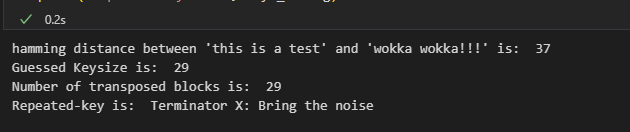